### <font color='red'> Project Description


- Source - https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
    

- The dataset is from Kaggle website. It contains 28 variables for 5043 movies, spanning across 100 years in 66 countries.   There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the   other 27 variables are possible predictors.
    
    Below is explanation of every attribute:
            
        
- movie_title	= Title of the Movie
- duration	= Duration in minutes
- director_name	= Name of the Director of the Movie
-   director_facebook_likes	= Number of likes of the Director on his Facebook Page
-  actor_1_name	= Primary actor starring in the movie
-  actor_1_facebook_likes	= Number of likes of the Actor_1 on his/her Facebook Page
-  actor_2_name	= Other actor starring in the movie
-  actor_2_facebook_likes	= Number of likes of the Actor_2 on his/her Facebook Page
-  actor_3_name	= Other actor starring in the movie
-  actor_3_facebook_likes	= Number of likes of the Actor_3 on his/her Facebook Page
- num_user_for_reviews	= Number of users who gave a review
- num_critic_for_reviews = 	Number of critical reviews on imdb
- num_voted_users	= Number of people who voted for the movie
- cast_total_facebook_likes = 	Total number of facebook likes of the entire cast of the movie
- movie_facebook_likes	= Number of Facebook likes in the movie page
- plot_keywords	= Keywords describing the movie plot
- facenumber_in_poster	= Number of the actor who featured in the movie poster
- color	= Film colorization. ‘Black and White’ or ‘Color’
- Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
- title_year	The year in which the movie is released (1916:2016)
- language	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
- country	Country where the movie is produced
- content_rating	Content rating of the movie
- aspect_ratio	Aspect ratio the movie was made in
- movie_imdb_link	IMDB link of the movie
- gross	Gross earnings of the movie in Dollars
- budget	Budget of the movie in Dollars
- imdb_score	IMDB Score of the movie on IMDB
    
        

### <font color='red'> Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with AdaBoost boosting.
- Apply one model with gradient boosting.
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models 


# Pre-processing

In [1]:
import pandas as pd                     #Load libraries
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
from scipy import stats
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import os

In [2]:

df = pd.read_csv("movie_metadata.csv")
df1 = df.copy

In [3]:
df.groupby('color')['color'].count()    

color
 Black and White     209
Color               4815
Name: color, dtype: int64

In [4]:
df['color'] = df['color'].fillna('Color')         #Fill null values
df['director_name'] = df['director_name'].fillna('Unknown/Multiple')    #Fill null values

In [5]:
df['duration'] = df['duration'].fillna(df['duration'].mean())   #Fill null values with mean
df['num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mean())
df['director_facebook_likes'] = df['director_facebook_likes'].fillna(df['director_facebook_likes'].mean())    
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].mean())
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].mean())
df['actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].mean())
df['facenumber_in_poster'] = df['facenumber_in_poster'].fillna(0)
df['num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].mean())

In [6]:
df.loc[:,'gross']=df.loc[:,'gross'].replace(0,np.nan, regex = True)
df.loc[:,'gross']=df.loc[:,'gross'].fillna(df['gross'].mean())

df.loc[:,'budget']=df.loc[:,'budget'].replace(0,np.nan, regex = True)
df.loc[:,'budget']=df.loc[:,'budget'].fillna(df['budget'].mean())

In [7]:
df['actor_1_name'] = df['actor_1_name'].fillna('Unknown')
df['actor_2_name'] = df['actor_2_name'].fillna('Unknown')     #Fill null values
df['actor_3_name'] = df['actor_3_name'].fillna('Unknown')

In [8]:
df['language'] = df['language'].fillna('English')   #Fill null values
df['country'] = df['country'].fillna('USA')  #Fill null values
df.loc[:,'content_rating'] = df.loc[:,'content_rating'].fillna('Unrated')

In [9]:
df = df[~df['title_year'].isna()]  #Most rows with empty title year are documentries or series 
#Most rows with empty title year do not have gross or budget

In [10]:
del df['aspect_ratio']         

In [11]:
df.isnull().sum()      #Null value check

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                140
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [12]:
df_new = df.copy()

In [13]:
l = ['movie_title','director_name','actor_1_name','actor_2_name','actor_3_name','facenumber_in_poster',
     'plot_keywords','language','movie_imdb_link']
df_new.drop(l, axis = 1, inplace = True)

In [14]:
df_new.shape

(4935, 18)

In [15]:
new = ((df_new['country'] != 'USA') & (df_new['country'] != 'UK'))
df_new.loc[new,'country'] = 'Others'

In [16]:
dummies = pd.get_dummies(df_new['color'])
df_new = pd.concat([df_new, dummies], axis = 1)
df_new.drop('color', axis = 1, inplace=True)

In [17]:
dummies = pd.get_dummies(df_new['content_rating'])
df_new = pd.concat([df_new, dummies], axis = 1)
df_new.drop('content_rating', axis = 1, inplace=True)

In [18]:
dummies = pd.get_dummies(df_new['country'])
df_new = pd.concat([df_new, dummies], axis = 1)
df_new.drop('country', axis = 1, inplace=True)

In [19]:
df_new.shape

(4935, 35)

In [20]:
dfn = df_new.copy()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
dfn = dfn.select_dtypes(exclude=['object'])

In [23]:
y = dfn["imdb_score"]
X = dfn.drop(["imdb_score"], 1)
X_train_org , X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\pooja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Regression Task

In [25]:
#importing Libraries

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor

### SVR and KNeighbors

In [26]:
svr = SVR( kernel = "rbf", C=10, gamma = 0.01)
svr.fit(X_train, y_train)

knn = KNeighborsRegressor(9)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=9, p=2,
          weights='uniform')

### Bagging

In [27]:
from sklearn.ensemble import BaggingRegressor

bag_clf1 = BaggingRegressor(svr, n_estimators=500, bootstrap= True, max_features=20, random_state = 0)
bag_clf2 = BaggingRegressor(knn, n_estimators=500, bootstrap= True, max_features=20, random_state = 0)

bag_clf1.fit(X_train, y_train)
print("Kernelized SVR Bagging Score {:.4f}".format(bag_clf1.score(X_test, y_test)))

bag_clf2.fit(X_train, y_train)
print("K-Nearest Neighbor Bagging Score {:.4f}".format(bag_clf2.score(X_test, y_test)))


Kernelized SVR Bagging Score 0.3694
K-Nearest Neighbor Bagging Score 0.3599


### Pasting 

In [28]:
bag_clf1 = BaggingRegressor(svr, n_estimators=500, bootstrap= False, max_features=20, random_state = 0)
bag_clf2 = BaggingRegressor(knn, n_estimators=500, bootstrap= False, max_features=20, random_state = 0)

bag_clf1.fit(X_train, y_train)
print("Kernelized SVR Bagging Score {:.4f}".format(bag_clf1.score(X_test, y_test)))

bag_clf2.fit(X_train, y_train)
print("K-Nearest Neighbor Bagging Score {:.4f}".format(bag_clf2.score(X_test, y_test)))


Kernelized SVR Bagging Score 0.3689
K-Nearest Neighbor Bagging Score 0.3610


### Boosting

In [29]:
from sklearn.ensemble import AdaBoostRegressor

In [30]:
#Adaboosting 1
ada1 = AdaBoostRegressor(svr, n_estimators = 200, learning_rate = 0.5, random_state = 0)
ada1.fit(X_train, y_train)
print("Decision Tree with ADABoost Score {:.4f}".format(ada1.score(X_test,y_test)))

ada2 = AdaBoostRegressor(knn, n_estimators = 200, learning_rate = 0.5, random_state = 0)
ada2.fit(X_train, y_train)
print("Logistic Regression with ADABoost Score {:.4f}".format(ada2.score(X_test,y_test)))

Decision Tree with ADABoost Score 0.0416
Logistic Regression with ADABoost Score 0.0525


### Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=50, learning_rate=0.5, random_state=0)
gbrt.fit(X_train,y_train)
print("Gradient Boosting Regression Trees Test score {:.2f}".format(gbrt.score(X_test,y_test)))

Gradient Boosting Regression Trees Test score 0.47


# PCA

In [33]:
X.shape

(4935, 33)

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [35]:
pca.n_components_

24

In [36]:
scaler = MinMaxScaler()
X_train_reduced = scaler.fit_transform(X_train_pca)
X_test_reduced = scaler.transform(X_test_pca)

In [37]:
final_train = []
final_test = []

### Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#step 1: create model
lreg = LinearRegression()

#step 2: train the model
lreg.fit(X_train_reduced, y_train)

#step 3 : evaluation
print('Train_score: {:.4f}'.format(lreg.score(X_train_reduced, y_train)))
print('Test_score: {:.4f}'.format(lreg.score(X_test_reduced, y_test)))

final_train.append(lreg.score(X_train_reduced, y_train))
final_test.append(lreg.score(X_test_reduced, y_test))

Train_score: 0.2964
Test_score: 0.2626


### Polynomial Regression

In [39]:
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

train_score_list = []
test_score_list = []

In [40]:

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

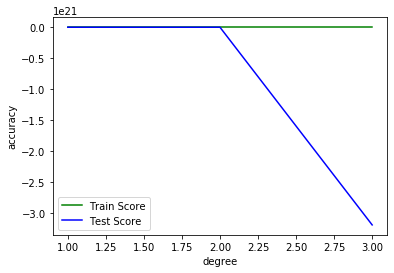

In [41]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

In [42]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_reduced)
X_test_poly = poly.transform(X_test_reduced)
lreg.fit(X_train_poly, y_train)

scores = cross_val_score(lreg, X_train_poly, y_train, cv = 5)
final_train.append(scores.mean())

scores = cross_val_score(lreg, X_test_poly, y_test, cv = 5)
final_test.append(scores.mean())

### KNeighbors Regressor

In [43]:
%matplotlib inline
train_score_array = []
test_score_array = []


In [44]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn = KNeighborsRegressor()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)

#fit model to data
knn_gscv.fit(X_train_reduced, y_train)

print("Best parameter is {}".format(knn_gscv.best_params_))
print("Best score is {:.4f}".format(knn_gscv.best_score_))


Best parameter is {'n_neighbors': 9}
Best score is 0.2810


Text(0, 0.5, 'MSE')

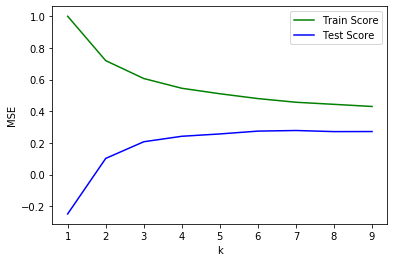

In [45]:
for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_reduced, y_train)
    train_score_array.append(knn_reg.score(X_train_reduced, y_train))
    test_score_array.append(knn_reg.score(X_test_reduced, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [46]:
knn = KNeighborsRegressor(9)
scores = cross_val_score(knn, X_train_reduced, y_train, cv = 5)
final_train.append(scores.mean())

scores = cross_val_score(knn, X_test_reduced, y_test, cv = 5)
final_test.append(scores.mean())

### Ridge 

In [47]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

In [48]:
for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    train_score_list.append(np.mean(cross_val_score(ridge,X_train_reduced,y_train,cv=5)))
    test_score_list.append(np.mean(cross_val_score(ridge,X_test_reduced, y_test,cv=5)))

Text(0.5, 0, '$\\alpha$')

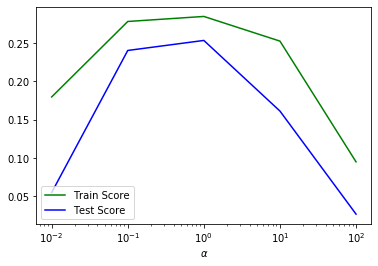

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [50]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.28


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
ridge = Ridge(1)
scores = cross_val_score(ridge, X_train_reduced, y_train, cv = 5)
final_train.append(scores.mean())

scores = cross_val_score(ridge, X_test_reduced, y_test, cv = 5)
final_test.append(scores.mean())

### Lasso

In [52]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    train_score_list.append(lasso.score(X_train_reduced,y_train))
    test_score_list.append(lasso.score(X_test_reduced, y_test))

Text(0.5, 0, '$\\alpha$')

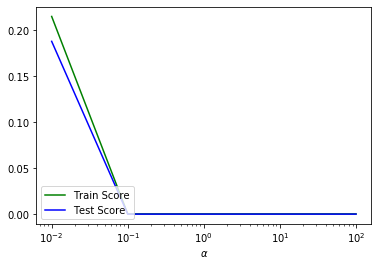

In [53]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [54]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_reduced, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.28


In [55]:
lasso = Lasso(0.001)
scores = cross_val_score(lasso, X_train_reduced, y_train, cv = 5)
final_train.append(scores.mean())

scores = cross_val_score(lasso, X_test_reduced, y_test, cv = 5)
final_test.append(scores.mean())

### SVM

In [56]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
print("Best parameters for scaled: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters for scaled: {'C': 10, 'gamma': 10}
Best cross-validation score: 0.3559


In [58]:
from sklearn.svm import SVR
svr_simple = SVR(kernel = "linear", C=10, gamma = 10)
svr_simple.fit(X_train_reduced,y_train)


#step 3 : evaluation
print('Train_score:', svr_simple.score(X_train_reduced, y_train))
print('Test_score:', svr_simple.score(X_test_reduced, y_test))

#step 4 : Cross Validation
scores = cross_val_score(svr_simple, X_train_reduced, y_train, cv=5)
print("Cross-validation train_scores: {}".format(scores))
print("Average cross-validation train_scores: {:.2f}".format(scores.mean()))
final_train.append(scores.mean())

scores = cross_val_score(svr_simple, X_test_reduced, y_test, cv=5)
print("Cross-validation test_scores: {}".format(scores))
print("Average cross-validation test_scores: {:.2f}".format(scores.mean()))
final_test.append(scores.mean())

Train_score: 0.27348289515229196
Test_score: 0.25091363549516343
Cross-validation train_scores: [ 0.29555466  0.26692391  0.2704178  -0.02511663  0.23064448]
Average cross-validation train_scores: 0.21
Cross-validation test_scores: [0.23679063 0.21582428 0.23764053 0.24496401 0.23437838]
Average cross-validation test_scores: 0.23


In [59]:
from sklearn.svm import SVR

svr = SVR(kernel = 'rbf')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, return_train_score=True)

grid_search.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [60]:
print("Best parameters for scaled: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))

Best parameters for scaled: {'C': 10, 'gamma': 10}
Best cross-validation score: 0.3559


In [61]:
from sklearn.svm import SVR
svr_kernel = SVR(kernel = "rbf")
svr_kernel.fit(X_train_reduced,y_train)

c_range = [0.01, 0.1, 1, 10, 100]

train_score_list = []
test_score_list = []

for c in c_range: 
    svr_kernel = SVR(C = c, gamma = 10, kernel = "rbf")
    svr_kernel.fit(X_train_reduced,y_train)
    train_score_list.append(svr_kernel.score(X_train_reduced,y_train))
    test_score_list.append(svr_kernel.score(X_test_reduced, y_test))

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Text(0.5, 0, '$\\gamma$')

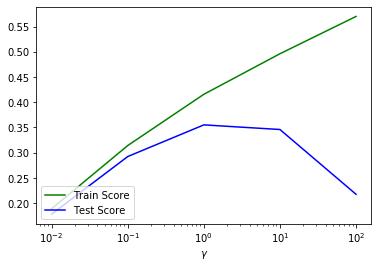

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(c_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(c_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\gamma$')

In [63]:
svr_simple = SVR( kernel = "rbf", C=10, gamma = 10)

scores = cross_val_score(svr_simple, X_train_reduced, y_train, cv=5)
final_train.append(scores.mean())

scores = cross_val_score(svr_simple, X_test_reduced, y_test, cv=5)
final_test.append(scores.mean())

### Deep Learning

In [64]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


In [65]:
#using grid search to find the optimum number of parameters fro epchos and atch size
np.random.seed(0) # for reproducibility

# Function to create model, required for KerasRegressor
def create_model():
    # create model
    model1 = Sequential()
    model1.add(Dense(12, activation='relu'))
    model1.add(Dense(8, activation='relu'))
    model1.add(Dense(1, activation='relu'))
    
    #compile Model
    model1.compile(loss='mse', optimizer = 'adam', metrics =['mse'])
    return model1

base_reg = KerasRegressor(build_fn=create_model, verbose = -1)  #return_train_score=True

# grid search epochs, batch size and optimizer

grid_param = {'epochs':[50,100,150],'batch_size':[20,50,100]}
grid = GridSearchCV(estimator=base_reg, param_grid=grid_param)



In [66]:
grid_result = grid.fit(X_train, y_train.values)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/5

Epoch 26/150
Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150
Epoch 55/150
Epoch 56/150
Epoch 57/150
Epoch 58/150
Epoch 59/150
Epoch 60/150
Epoch 61/150
Epoch 62/150
Epoch 63/150
Epoch 64/150
Epoch 65/150
Epoch 66/150
Epoch 67/150
Epoch 68/150
Epoch 69/150
Epoch 70/150
Epoch 71/150
Epoch 72/150
Epoch 73/150
Epoch 74/150
Epoch 75/150
Epoch 76/150
Epoch 77/150
Epoch 78/150
Epoch 79/150
Epoch 80/150
Epoch 81/150
Epoch 82/150
Epoch 83/150
Epoch 84/150
Epoch 85/150
Epoch 86/150
Epoch 87/150
Epoch 88/150
Epoch 89/150
Epoch 90/150
Epoch 91/150
Epoch 92/150
Epoch 93/150
Epoch 94/150
Epoch 95/150
Epoch 96/150
Epoch 97/150
Epoch 98/150
Epoch 99/150
Epoch 100/150
Epoch 101/150
Epoch 102/

Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100

Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/

Epoch 129/150
Epoch 130/150
Epoch 131/150
Epoch 132/150
Epoch 133/150
Epoch 134/150
Epoch 135/150
Epoch 136/150
Epoch 137/150
Epoch 138/150
Epoch 139/150
Epoch 140/150
Epoch 141/150
Epoch 142/150
Epoch 143/150
Epoch 144/150
Epoch 145/150
Epoch 146/150
Epoch 147/150
Epoch 148/150
Epoch 149/150
Epoch 150/150
Epoch 1/150
Epoch 2/150
Epoch 3/150
Epoch 4/150
Epoch 5/150
Epoch 6/150
Epoch 7/150
Epoch 8/150
Epoch 9/150
Epoch 10/150
Epoch 11/150
Epoch 12/150
Epoch 13/150
Epoch 14/150
Epoch 15/150
Epoch 16/150
Epoch 17/150
Epoch 18/150
Epoch 19/150
Epoch 20/150
Epoch 21/150
Epoch 22/150
Epoch 23/150
Epoch 24/150
Epoch 25/150
Epoch 26/150
Epoch 27/150
Epoch 28/150
Epoch 29/150
Epoch 30/150
Epoch 31/150
Epoch 32/150
Epoch 33/150
Epoch 34/150
Epoch 35/150
Epoch 36/150
Epoch 37/150
Epoch 38/150
Epoch 39/150
Epoch 40/150
Epoch 41/150
Epoch 42/150
Epoch 43/150
Epoch 44/150
Epoch 45/150
Epoch 46/150
Epoch 47/150
Epoch 48/150
Epoch 49/150
Epoch 50/150
Epoch 51/150
Epoch 52/150
Epoch 53/150
Epoch 54/150

C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [67]:
print("\nBest parameters : {}".format(grid_result.best_params_))
print("Best score : %0.4f" % (grid_result.best_score_))



Best parameters : {'batch_size': 20, 'epochs': 100}
Best score : -0.7843


### Comparing results of Project 1 and Project 2

In [68]:
final_test = pd.to_numeric(final_test)
final_test1 = [ '%.4f' % elem for elem in final_test ]

In [69]:
final_train = pd.to_numeric(final_train)
final_train1 = [ '%.4f' % elem for elem in final_train ]

In [70]:
test = final_test1
train = final_train1

In [71]:
del test[1]
del train[1]

In [72]:

model_names=['LinearRegression','KNeighborsRegressor','Ridge', 'Lasso','Simple Kernel','rbf Kernel']

d={'Modelling Algo':model_names,'CV Train Score':train, 'CV Test Score': test}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,CV Train Score,CV Test Score
0,LinearRegression,0.2964,0.2626
1,KNeighborsRegressor,0.2810,0.2128
2,Ridge,0.2847,0.2534
3,Lasso,0.2842,0.2556
4,Simple Kernel,0.2077,0.2339
5,rbf Kernel,0.3559,0.2881


In [73]:
result = pd.read_csv('results_reg.csv')

In [74]:
models = result['Algorithms']

p1_train = result['P1_Train']
p1_test = result['P1_Test']

p2_train = result['P2_Train']
p2_test = result['P2_Test']

In [75]:
d1={'Modelling Algo':models,'Project1 Train Score':p1_train, 'Project2 Train Score': p2_train}
train_df=pd.DataFrame(d1)

d2={'Modelling Algo':models,'Project1 Test Score':p1_test, 'Project2 Test Score': p2_test}
test_df=pd.DataFrame(d2)

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

def comp_models(model,metric1,metric2):
    plt.rcParams["figure.figsize"] = (10,6)
    if(model == 0): 
        plt.title('\nComparing Train Scores\n', fontdict={'fontsize' : 18})
    if(model == 1): 
        plt.title('\nComparing Test Scores\n', fontdict={'fontsize' : 18})
    plt.plot(models, metric1, label = 'Project1 score')
    plt.plot(models, metric2, label = 'Project2 score')
    plt.legend()
    plt.xlabel('Modelling Algorithms')
    plt.ylabel('Accuracy')
    


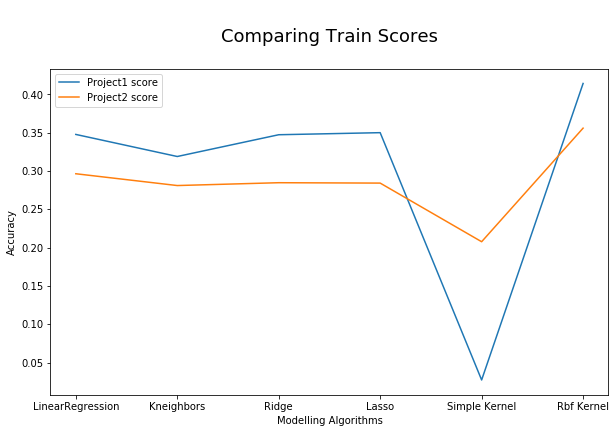

In [77]:
comp_models(0, p1_train, p2_train)

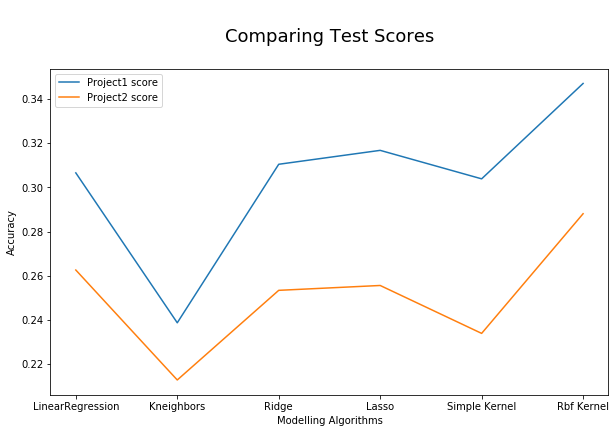

In [78]:
comp_models(1, p1_test, p2_test)

## Regression Interpretations

#### Linear Regression:	
                         Train CV Score 	Test CV Score 	
    PART 1 :           	    0.3477 	          0.3066	            
    PART 2(PCA 95%):   	    0.2964 	          0.2626	            

Linear Regression without PCA is better

#### KNN Regressor:	
                         Best Parameters 	  Train CV Score 	Test CV Score 	
    PART 1 :           {'n_neighbors': 9} 	      0.3189 	        0.2387	            
    PART 2(PCA 95%):   {'n_neighbors': 9} 	      0.2810 	        0.2128	            

KNN without PCA is performing better


#### Ridge:	
                            Best Parameters 	  Train CV Score 	Test CV Score 	
    PART 1 :           {'penalty' : L1 , 'C': 1} 	  0.3473 	        0.3105	            
    PART 2(PCA 95%):   {'penalty' : L1 , 'C': 10} 	  0.2847 	        0.2534	            
	
    Ridge without PCA is performing better

#### Lasso :	

                            Best Parameters 	  Train CV Score 	Test CV Score 	
    PART 1 :               {'max_depth' : 2} 	     0.3500 	        0.3168	            
    PART 2(PCA 95%):       {'max_depth' : 3} 	     0.2842 	        0.2556	            

    Lasso without PCA is performing better

#### Linear_SVM Regressor:	
                            Best Parameters 	  Train CV Score 	Test CV Score 	
    PART 1 :                  {'C': 0.1} 	         0.0273 	        0.3039	            
    PART 2(PCA 95%):          {'C': 1} 	             0.2077 	        0.2339	            

    Linear_SVM Regressor without PCA is performing better

####  RBF kernel:

                            Best Parameters 	       Train CV Score 	 Test CV Score 	
    PART 1 :           {'C' : 100 , 'gamma': 0.01} 	      0.4142 	        0.3471            
    PART 2(PCA 95%):   {'C': 10 , 'gamma' : 0.1} 	      0.3559 	        0.2881	            
	
    SVR with RBF kernel without PCA is performing better

	
